# <cengter>Prediction Of CO2 Emission In Canada Using Machine Learning 

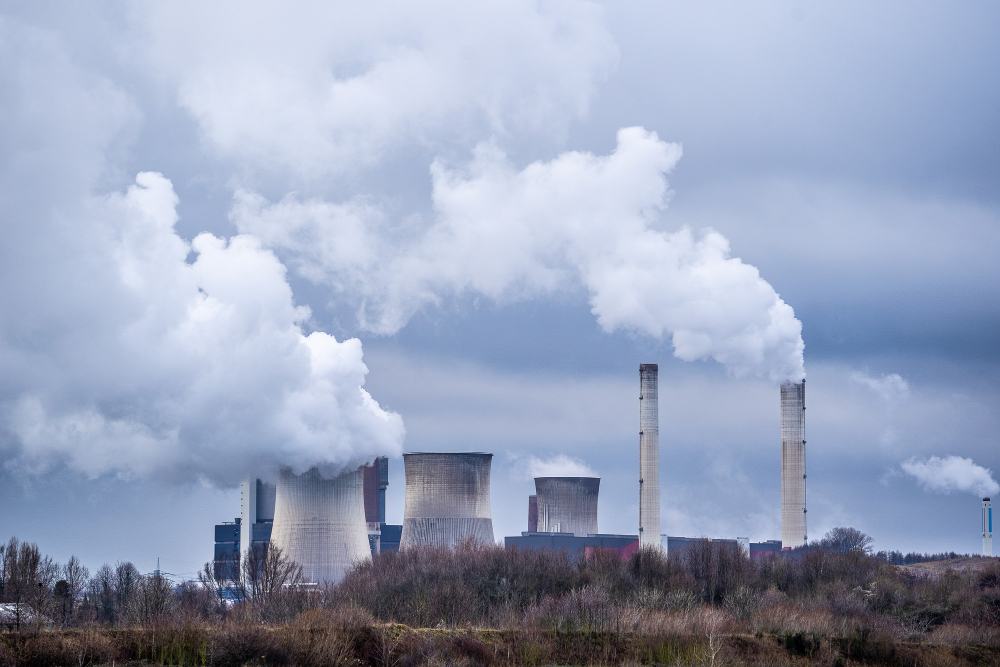

In this project we processing and exploring a large amount of data on CO2 Emission in Canada.
This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset has been taken from Canada Government official open data website. This is a compiled version. This contains data over a period of 7 years.
There are total 7385 rows and 12 columns.

##### You can download the dataset from the link given below
##### https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

#### Loading the dataset

In [2]:
data=pd.read_csv("./CO2 Emissions_Canada.csv")
data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


#### Data Exploration

In [3]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
data.tail()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [6]:
data.shape

(7385, 12)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [8]:
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

##### Renaming the columns

In [9]:
data.rename(columns={"Vehicle Class":"VehicleClass","Engine Size(L)":"EngineSize","Fuel Type":"FuelType","Fuel Consumption City (L/100 km)":"FuelConsumptionCity","Fuel Consumption Hwy (L/100 km)":"FuelConsumptionHwy","Fuel Consumption Comb (L/100 km)":"FuelConsumptionComb","Fuel Consumption Comb (mpg)":"FuelConsumptionComb_mpg","CO2 Emissions(g/km)":"CO2Emissions"},inplace=True)

##### Checking the null values

In [10]:
data.isnull().mean()*100

Make                       0.0
Model                      0.0
VehicleClass               0.0
EngineSize                 0.0
Cylinders                  0.0
Transmission               0.0
FuelType                   0.0
FuelConsumptionCity        0.0
FuelConsumptionHwy         0.0
FuelConsumptionComb        0.0
FuelConsumptionComb_mpg    0.0
CO2Emissions               0.0
dtype: float64

##### Checking the duplicated Values

In [11]:
data.duplicated().sum()

1103

In [12]:
data.drop_duplicates(inplace=True)

# Exploratory Data Analysis

### Univariate Analysis

##### Histogram

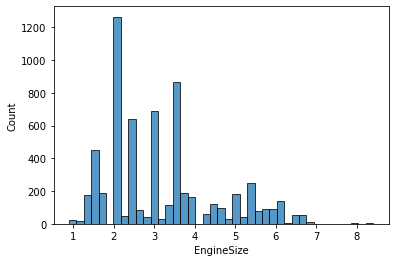

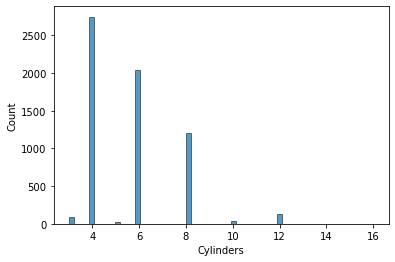

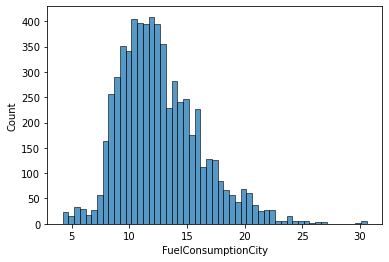

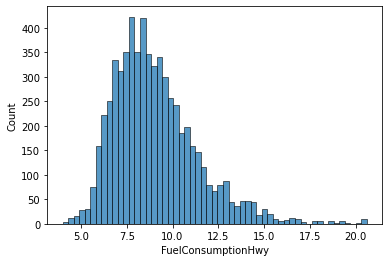

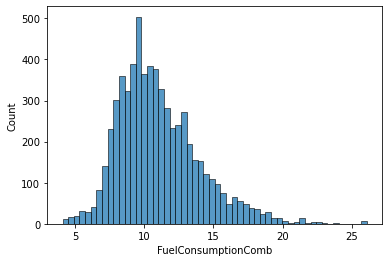

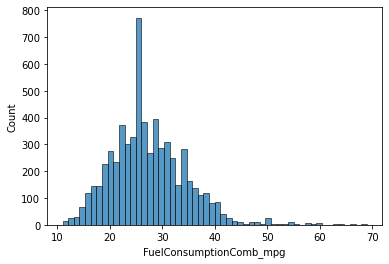

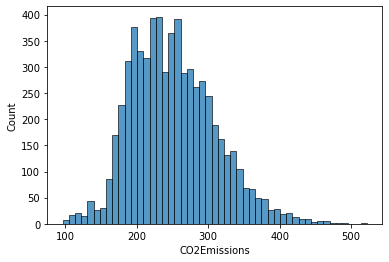

In [13]:
for i in data.columns:
    if data[i].dtype != "object":
        sns.histplot(x=data[i])
        plt.show()

##### KDE Plot

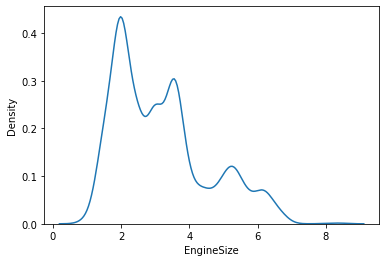

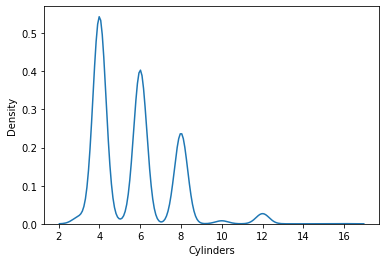

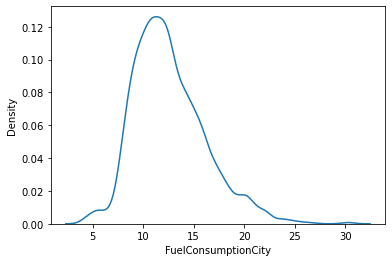

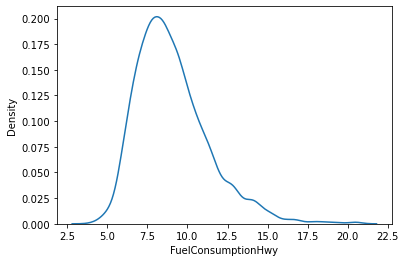

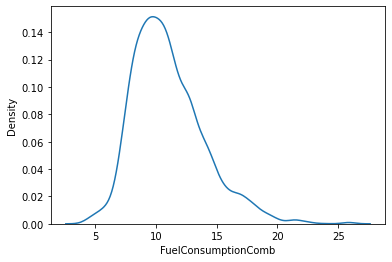

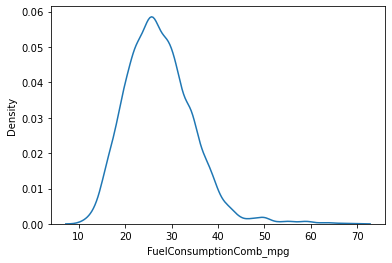

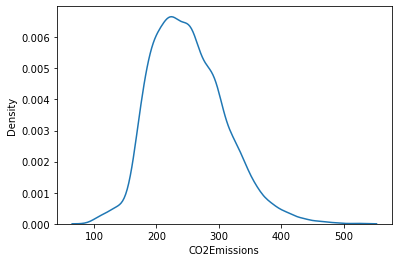

In [14]:
for i in data.columns:
    if data[i].dtype !="object":
        sns.kdeplot(x=data[i])
        plt.show()

##### Box Plot

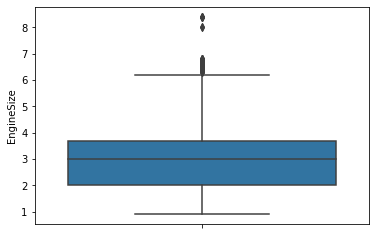

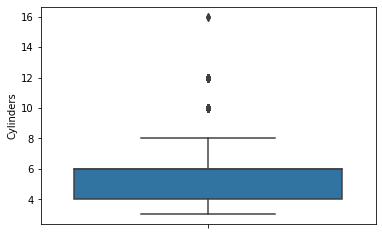

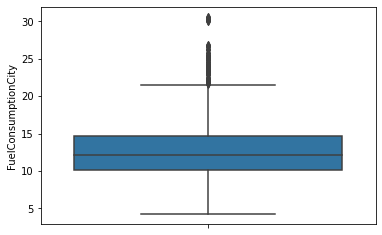

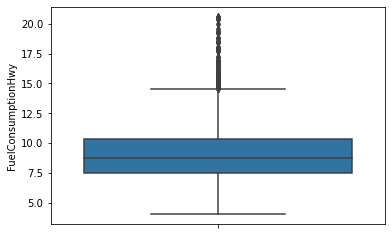

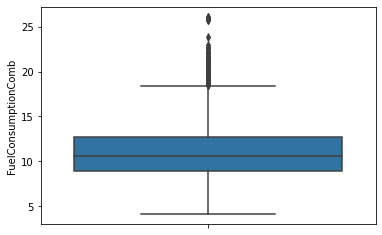

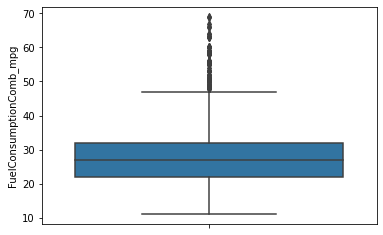

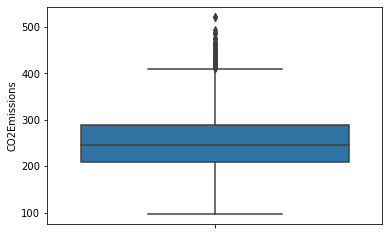

In [15]:
for i in data.columns:
    if data[i].dtype !="object":
        sns.boxplot(y=data[i])
        plt.show()

#### Outlier Treatment

In [22]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [23]:
for column in data.columns:
    if data[column].dtype !="object":
        UL,LL = outlier_limit(data[column])
        data[column] = np.where((data[column]>UL)|(data[column]<LL),np.nan,data[column])
        

##### After the Outlier treatment  drop the null values

In [24]:
data.dropna(inplace=True)

###### Now again plot the Boxplot

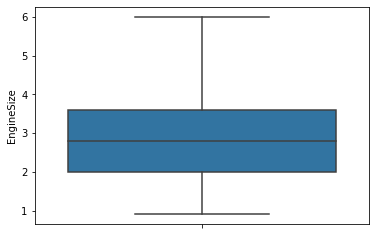

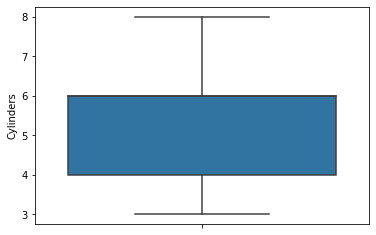

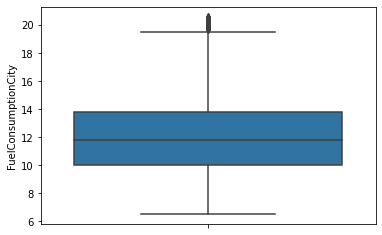

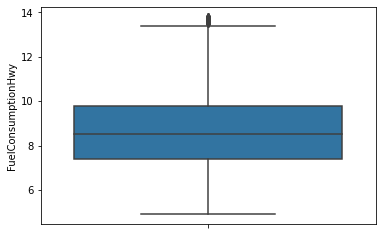

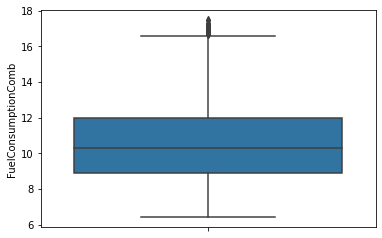

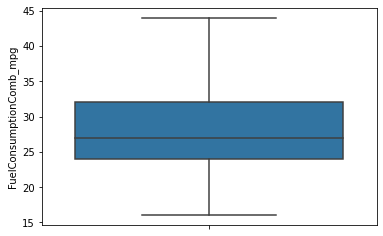

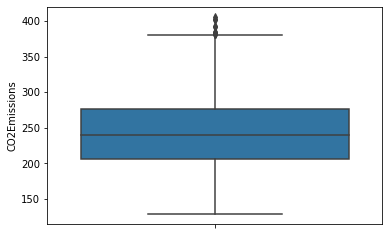

In [25]:
for i in data.columns:
    if data[i].dtype !="object":
        sns.boxplot(y=data[i])
        plt.show()

### Multivariate Analysis

In [27]:
data.columns

Index(['Make', 'Model', 'VehicleClass', 'EngineSize', 'Cylinders',
       'Transmission', 'FuelType', 'FuelConsumptionCity', 'FuelConsumptionHwy',
       'FuelConsumptionComb', 'FuelConsumptionComb_mpg', 'CO2Emissions'],
      dtype='object')

##### Bar Chart

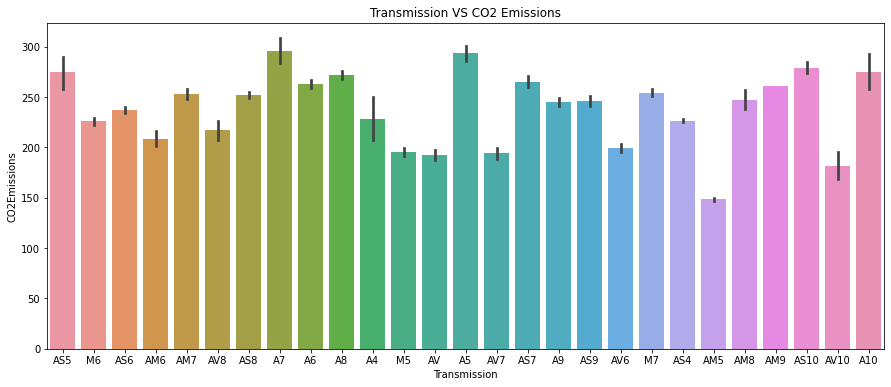

In [34]:
plt.figure(figsize=(15,6))
plt.title('Transmission VS CO2 Emissions')
sns.barplot(x= 'Transmission', y='CO2Emissions', data=data);

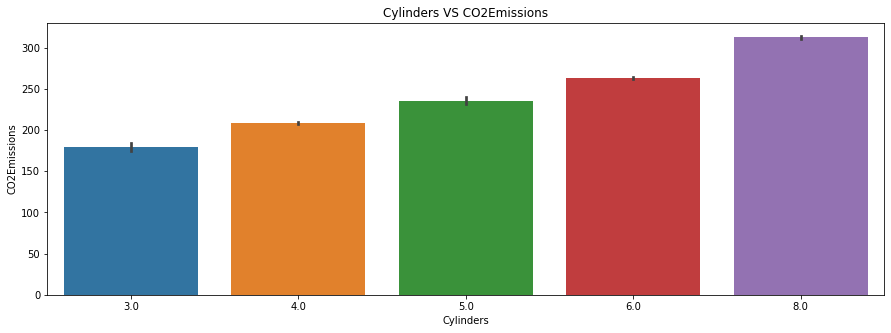

In [35]:
plt.figure(figsize=(15,5))
plt.title('Cylinders VS CO2Emissions')
sns.barplot(x= 'Cylinders', y= 'CO2Emissions', data=data);

##### Scatter Plot

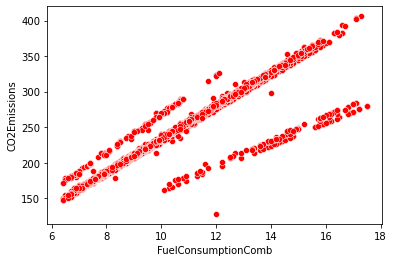

In [39]:
sns.scatterplot(data=data,x="FuelConsumptionComb",y="CO2Emissions",color="Red");

##### Pie Chart

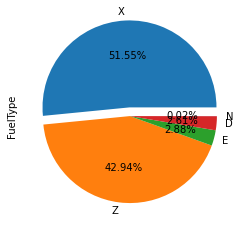

In [57]:
explode=0.1,0,0,0,0
data.FuelType.value_counts().plot.pie(autopct='%1.2f%%',explode=explode);

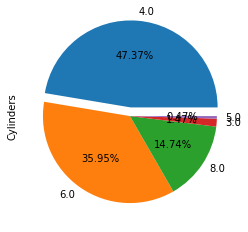

In [58]:
explode=0.1,0,0,0,0
data.Cylinders.value_counts().plot.pie(autopct='%1.2f%%',explode=explode);

##### Line Chart

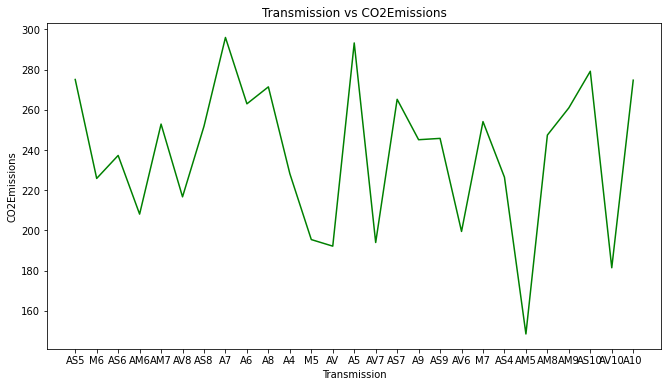

In [61]:
plt.figure(figsize=(11,6))
sns.lineplot(data=data,x="Transmission",y="CO2Emissions",color="Green",ci=None);
plt.title("Transmission vs CO2Emissions");

##### Pair Plot

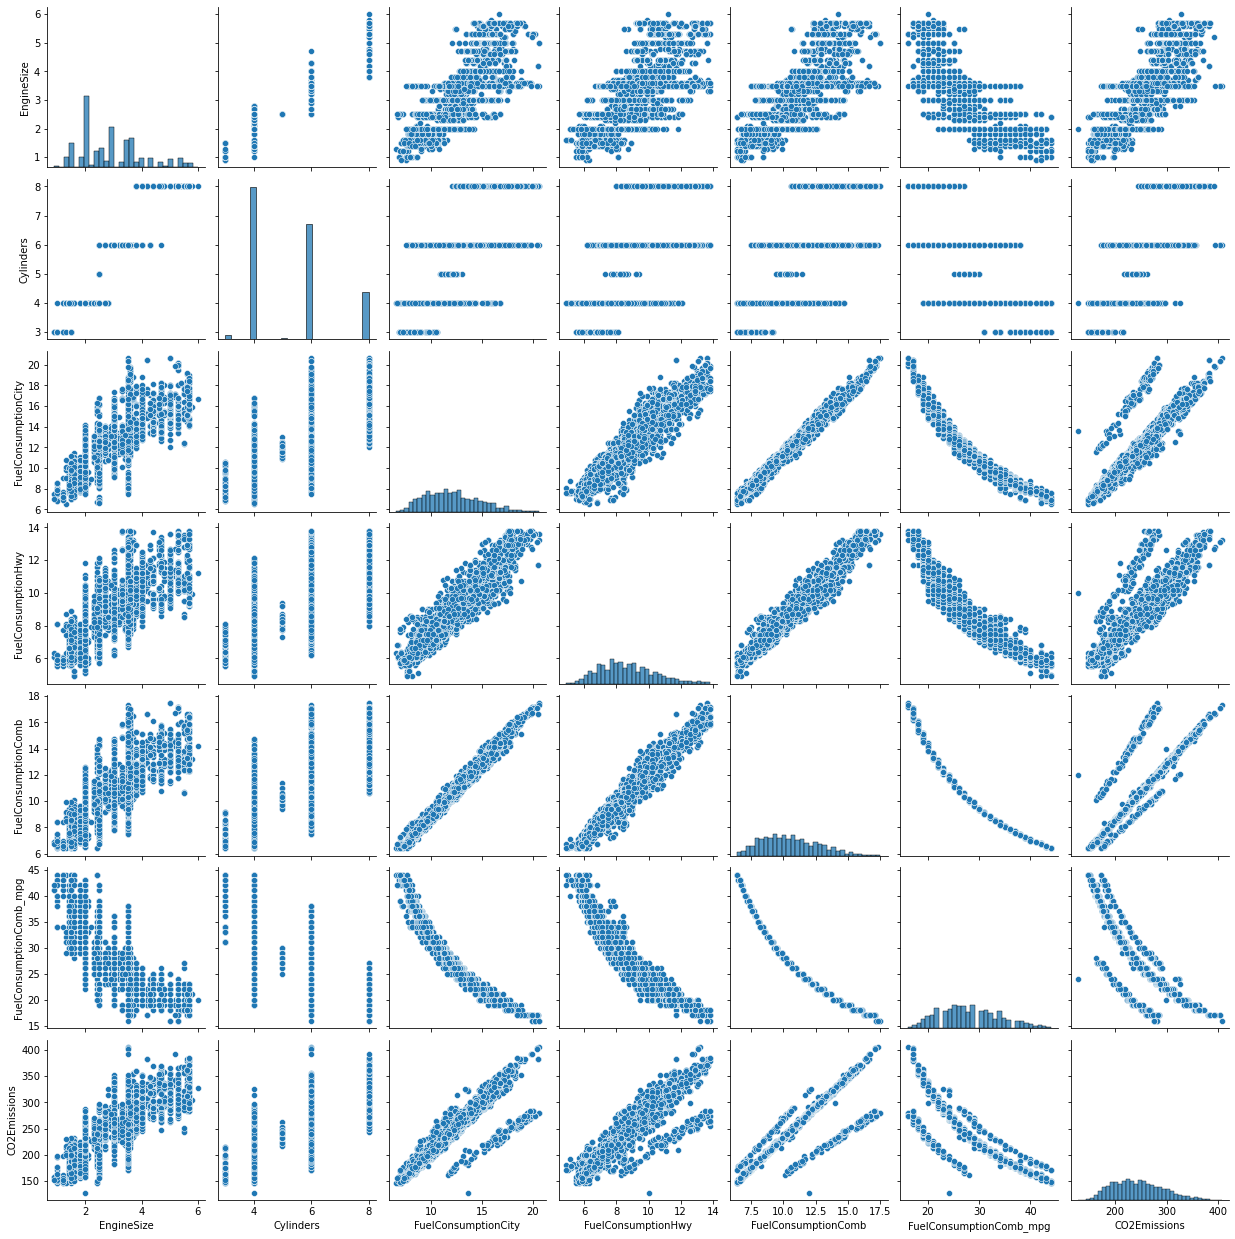

In [67]:
sns.pairplot(data=data);

#### Label Encoding

In [68]:
le = LabelEncoder()

In [69]:
data["Make"]=le.fit_transform(data["Make"])
data["Model"]=le.fit_transform(data["Model"])
data["VehicleClass"]=le.fit_transform(data["VehicleClass"])
data["Transmission"]=le.fit_transform(data["Transmission"])
data["FuelType"]=le.fit_transform(data["FuelType"])

#### Check the correlation of  other variables with the target variable "CO2 Emission"

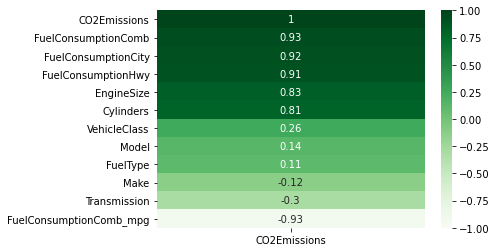

In [70]:
sns.heatmap(data.corr()[["CO2Emissions"]].sort_values(by="CO2Emissions",ascending=False),vmin=-1,vmax=1,annot=True,cmap="Greens");

#### Let's take only the variables which has good correlation with the target variable "CO2 Emission"

In [71]:
x=data[["FuelConsumptionComb","FuelConsumptionCity","FuelConsumptionHwy","EngineSize","Cylinders","VehicleClass","Model","FuelType"]].values
y=data[["CO2Emissions"]].values

#### Scaling

In [72]:
sc = StandardScaler()

In [73]:
x=sc.fit_transform(x)

In [74]:
models ={
    "LinearRegression":LinearRegression(),
    "RidgeRegression":Ridge(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "DecisionTreeRegresssor":DecisionTreeRegressor(),
    "LinearSvr":LinearSVR(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [75]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse =np.sqrt(-scores)
    rmse_avg = np.mean(rmse)
    print("AVG RMSE : ",rmse_avg)
    print("*"*100)

cross validation model : LinearRegression
AVG RMSE :  15.076284612033003
****************************************************************************************************
cross validation model : RidgeRegression
AVG RMSE :  15.07610118051283
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVG RMSE :  10.259763525110843
****************************************************************************************************
cross validation model : DecisionTreeRegresssor
AVG RMSE :  3.9316251249546355
****************************************************************************************************
cross validation model : LinearSvr
AVG RMSE :  17.630649160381925
****************************************************************************************************
cross validation model : RandomForestRegressor
AVG RMSE :  3.307151400781483
*******************************************************

#### Since The Random Forest Regressiohas minimum rmse value. So select Random Forest Regression as model

In [76]:
model=RandomForestRegressor()

##### Split the datase into training and testing data

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

###### Fit the model with the training data

In [78]:
model.fit(x_train,y_train)

RandomForestRegressor()

###### We can check the efficiency of the model

In [79]:
training_score = model.score(x_train,y_train)*100
testing_score = model.score(x_test,y_test)*100
R2_score = r2_score(y_test,model.predict(x_test))*100
mae = mean_absolute_error(y_test,model.predict(x_test))
mse = mean_squared_error(y_test,model.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",R2_score)
print("training_score: ",training_score)
print("testing_score: ",testing_score)
print("mae: ",mae)
print("mse: ",mse)
print("rmse: ",rmse)

r2score:  99.68413618627933
training_score:  99.90313081484189
testing_score:  99.68413618627933
mae:  1.9846316690198091
mse:  7.1941991904879075
rmse:  2.6822004381641404


###### Predicting values using the model

In [80]:
y_pred=model.predict(x)

###### After predicting we can compare it with the actual value

In [81]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("actual","predicted"),dtype="float")
OUTPUT.head()

,actual,predicted
0,196.0,197.003333
1,221.0,221.176667
2,255.0,255.040833
3,244.0,244.408000
4,230.0,233.660000


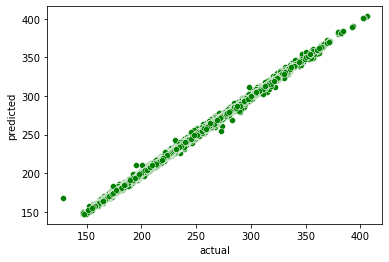

In [82]:
sns.scatterplot(data=OUTPUT,x="actual",y="predicted",color="Green");

##### We can Check the score of the model

In [83]:
model.score(x,y)*100

99.85906444049806